In [35]:
import pandas as pd
import numpy as np

In [36]:
df = pd.read_csv('SENG352 VERİ.csv')
df

,Bus Line,Date,Week,Trip Number,Bus Capacity,Passengers,Morning SR,Noon SR,Evening SR,Solidity Ratio
0,317,3/1/2024,Weekday,43,6020,3931,71.32%,55.27%,69.31%,65%
1,317,3/2/2024,Weekend,36,5040,3623,76.92%,63.48%,75.24%,72%
2,317,3/3/2024,Weekend,22,3080,1707,58.50%,50.29%,57.48%,55%
3,317,3/4/2024,Weekday,43,6020,3652,66.68%,50.63%,64.68%,61%
4,317,3/5/2024,Weekday,42,5880,4392,80.57%,64.89%,78.61%,75%
...,...,...,...,...,...,...,...,...,...,...
79,317,5/19/2024,Weekend,48,"6,923","4,654",74.15%,55.69%,71.84%,67%
80,317,5/20/2024,Weekday,47,"6,580","3,846",65.03%,47.48%,62.84%,58%
81,317,5/21/2024,Weekday,46,"6,440","4,122",70.45%,53.27%,68.30%,64%
82,317,5/22/2024,Weekday,47,"6,580","3,591",61.15%,43.61%,58.96%,55%


In [37]:
df['Bus Capacity'] = df['Bus Capacity'].str.replace(',', '').astype(int)
df['Passengers'] = df['Passengers'].str.replace(',', '').astype(int)
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')

In [38]:
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [39]:
df['IsWeekday'] = df['Week'].apply(lambda x: 1 if x == 'Weekday' else 0)

In [40]:
df['Morning SR'] = df['Morning SR'].str.rstrip('%').astype('float') / 100.0
df['Noon SR'] = df['Noon SR'].str.rstrip('%').astype('float') / 100.0
df['Evening SR'] = df['Evening SR'].str.rstrip('%').astype('float') / 100.0

In [41]:
df['Solidity Ratio'] = df['Solidity Ratio'].str.rstrip('%').astype('float') / 100.0


In [42]:
df

,Bus Line,Date,Week,Trip Number,Bus Capacity,Passengers,Morning SR,Noon SR,Evening SR,Solidity Ratio,DayOfWeek,IsWeekday
0,317,2024-03-01,Weekday,43,6020,3931,0.7132,0.5527,0.6931,0.65,4,1
1,317,2024-03-02,Weekend,36,5040,3623,0.7692,0.6348,0.7524,0.72,5,0
2,317,2024-03-03,Weekend,22,3080,1707,0.5850,0.5029,0.5748,0.55,6,0
3,317,2024-03-04,Weekday,43,6020,3652,0.6668,0.5063,0.6468,0.61,0,1
4,317,2024-03-05,Weekday,42,5880,4392,0.8057,0.6489,0.7861,0.75,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
79,317,2024-05-19,Weekend,48,6923,4654,0.7415,0.5569,0.7184,0.67,6,0
80,317,2024-05-20,Weekday,47,6580,3846,0.6503,0.4748,0.6284,0.58,0,1
81,317,2024-05-21,Weekday,46,6440,4122,0.7045,0.5327,0.6830,0.64,1,1
82,317,2024-05-22,Weekday,47,6580,3591,0.6115,0.4361,0.5896,0.55,2,1


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
print(df.describe())

       Bus Line                 Date  Trip Number  Bus Capacity   Passengers  \
count      84.0                   84    84.000000     84.000000    84.000000   
mean      317.0  2024-04-11 12:00:00    39.821429   5581.464286  3354.226190   
min       317.0  2024-03-01 00:00:00    21.000000   2940.000000  1092.000000   
25%       317.0  2024-03-21 18:00:00    38.000000   5320.000000  3228.500000   
50%       317.0  2024-04-11 12:00:00    43.000000   6020.000000  3614.500000   
75%       317.0  2024-05-02 06:00:00    44.000000   6160.000000  3860.250000   
max       317.0  2024-05-23 00:00:00    50.000000   7020.000000  5321.000000   
std         0.0                  NaN     7.370015   1036.601659   858.332235   

       Morning SR    Noon SR  Evening SR  Solidity Ratio  DayOfWeek  IsWeekday  
count   84.000000  84.000000   84.000000       84.000000  84.000000  84.000000  
mean     0.649582   0.500744    0.630983        0.593929   3.000000   0.714286  
min      0.371300   0.285500    0.36

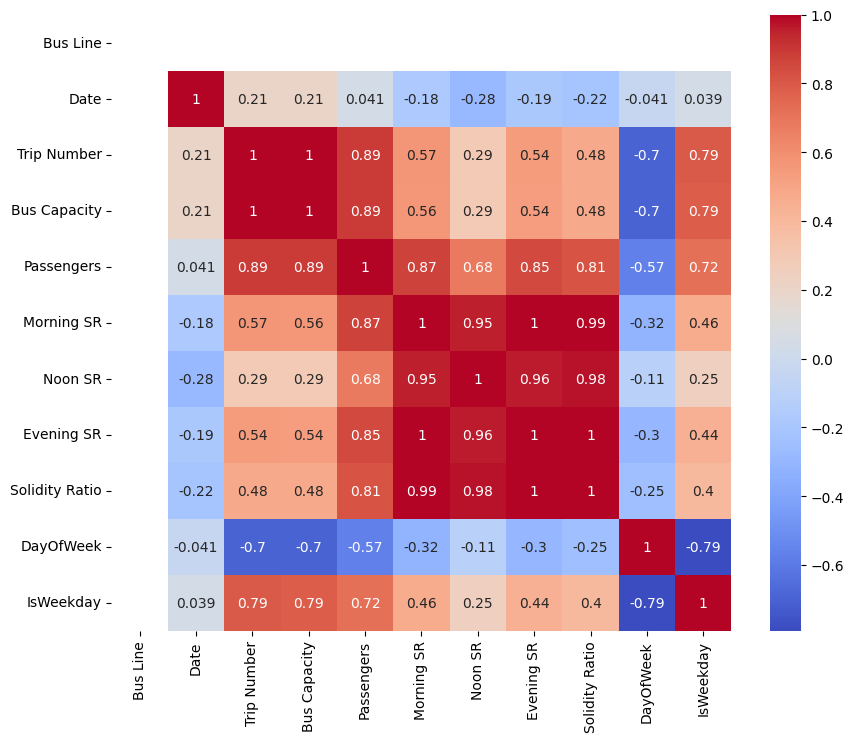

In [45]:
df = df.drop('Week', axis=1)
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

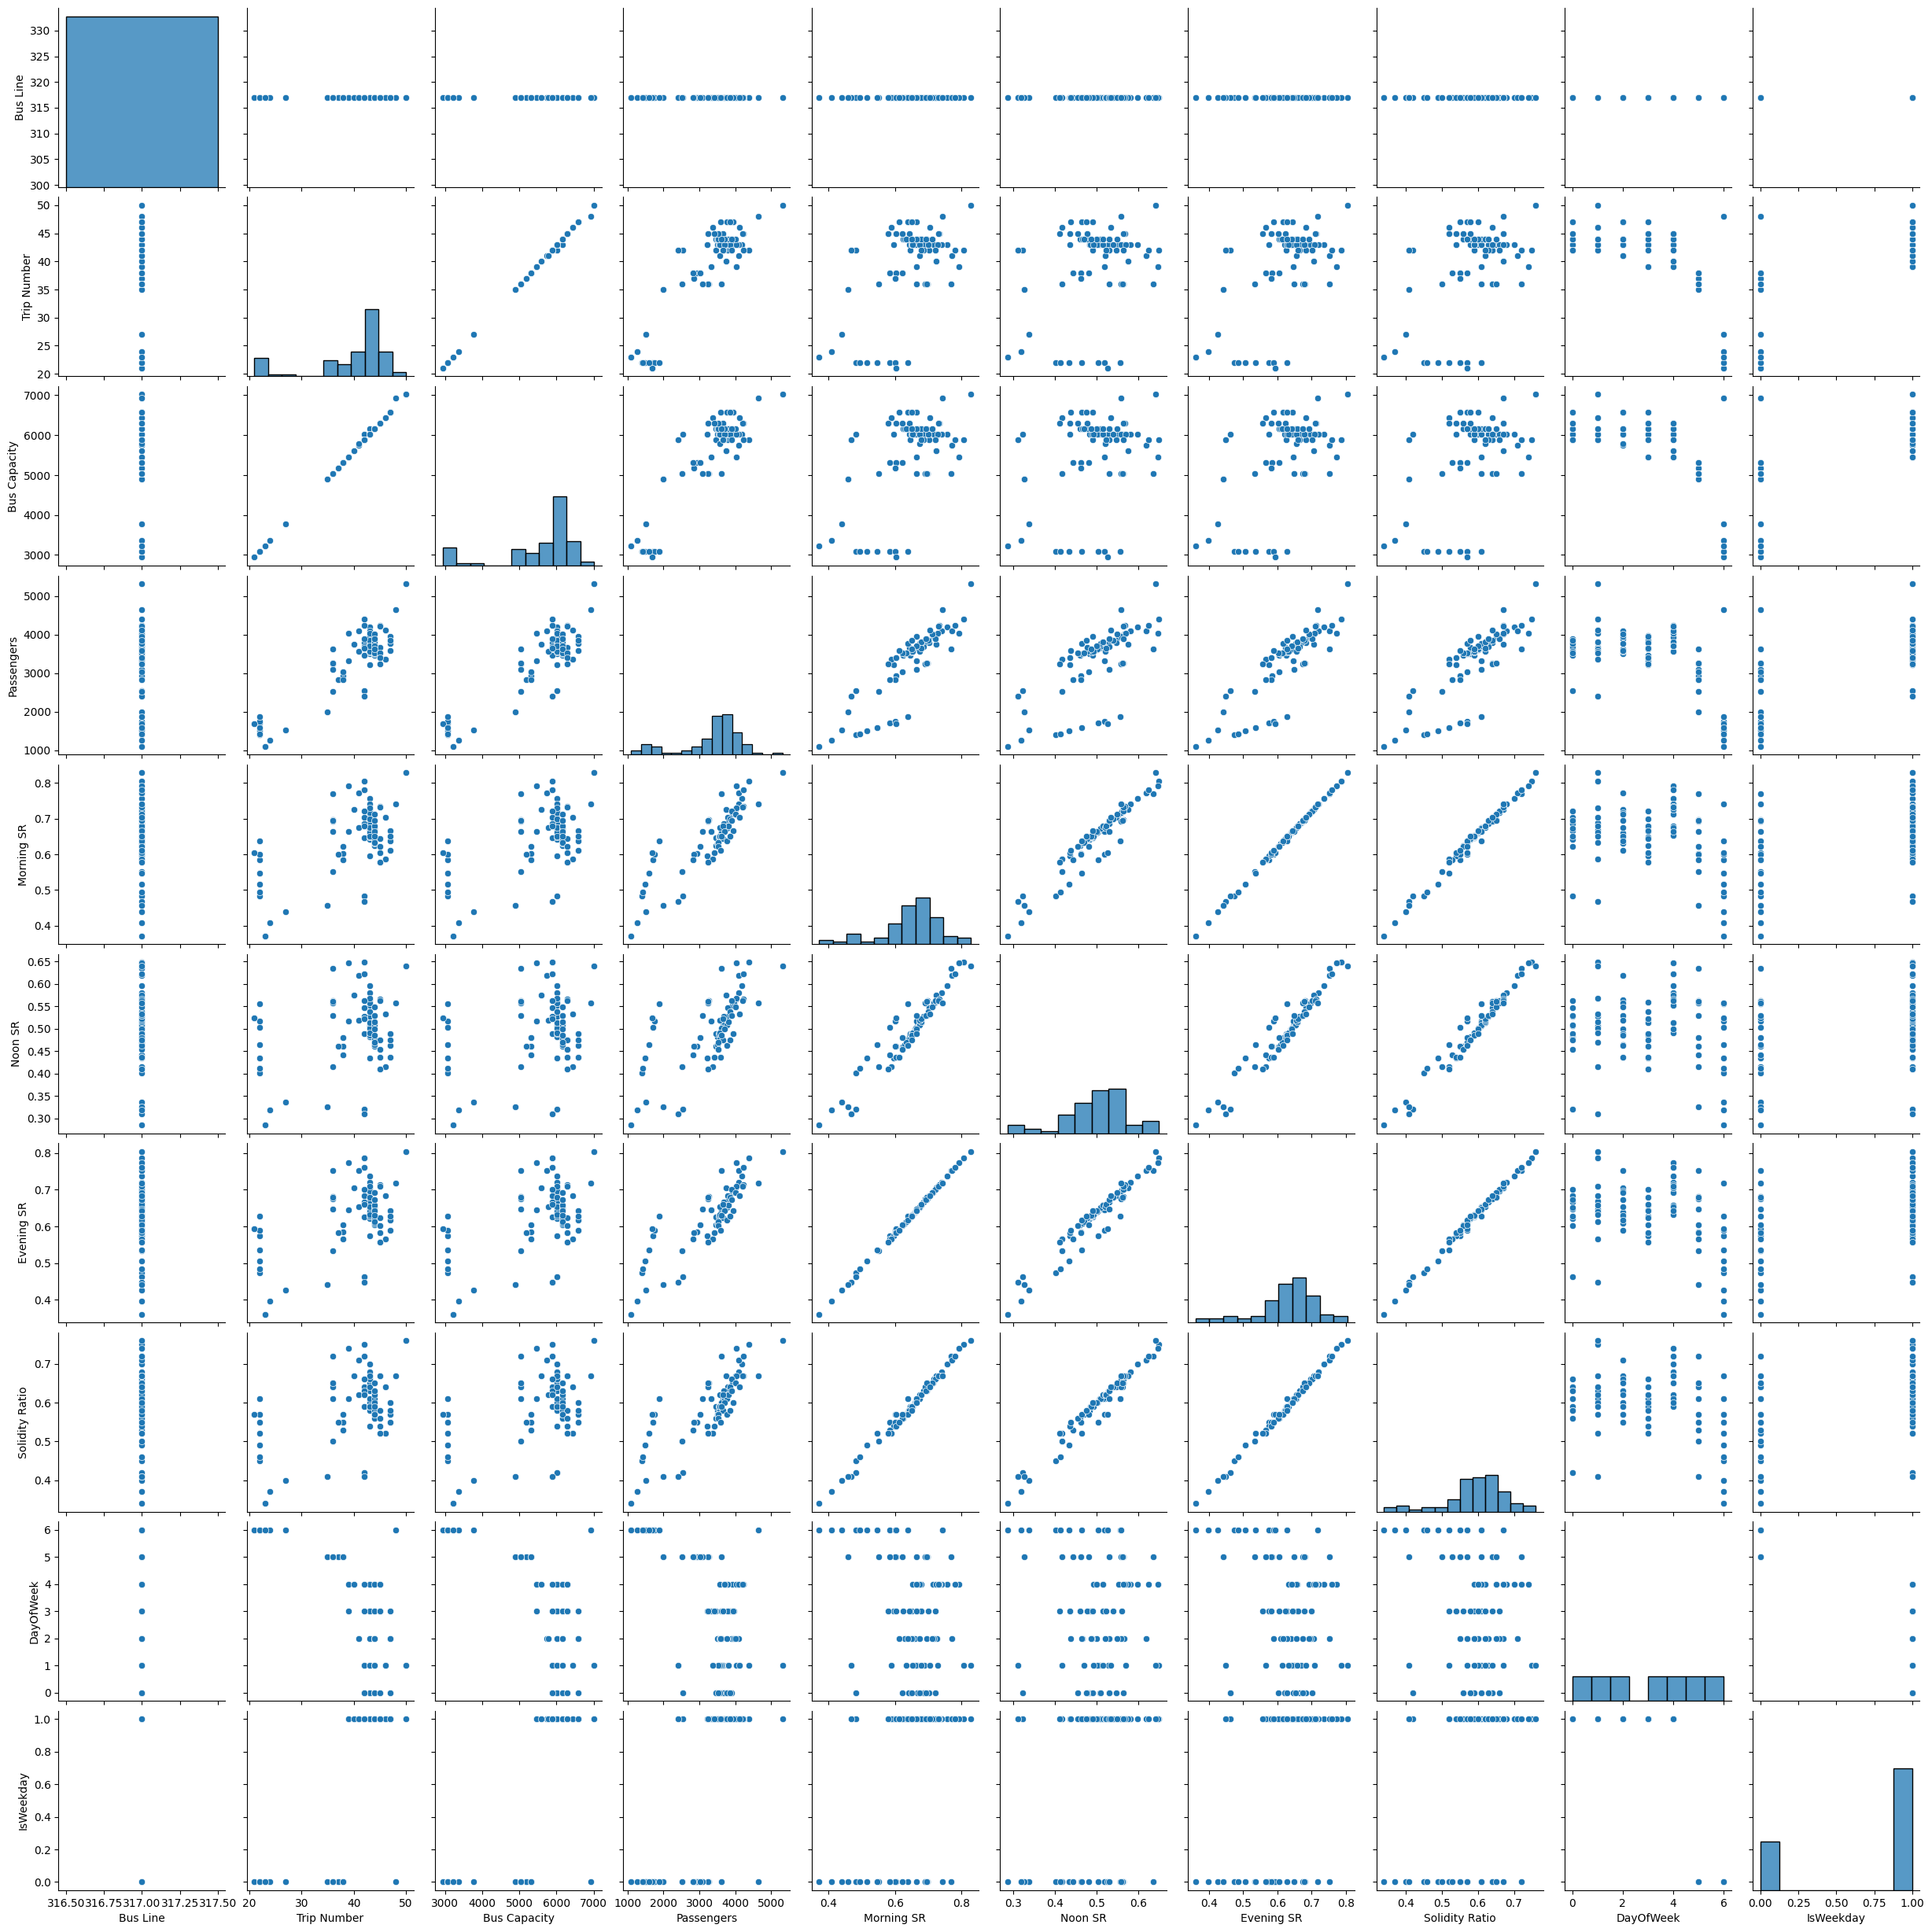

In [46]:
sns.pairplot(df)
plt.show()

In [47]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [48]:
X = df[['DayOfWeek', 'Trip Number', 'Bus Capacity', 'Passengers', 'Morning SR', 'Noon SR', 'Evening SR', 'IsWeekday']]
y = df['Solidity Ratio']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred = model.predict(X_test)

In [52]:
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))

R^2 Score: 0.9986149447945228
Mean Absolute Error (MAE): 0.0020452024428424566
Root Mean Squared Error (RMSE): 0.002568179631970447


In [53]:
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validated R^2 scores:", scores)
print("Average Cross-validated R^2 score:", scores.mean())

Cross-validated R^2 scores: [0.99759998 0.99749269 0.99953953 0.9979867  0.9989148 ]
Average Cross-validated R^2 score: 0.9983067422520598
